In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [20]:
from scipy.io import loadmat
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import cdist
from scipy.sparse.linalg import svds, eigs
from scipy.special import erf
from numpy.matlib import repmat

set_printoptions(formatter={'float': lambda x: "{0:0.5f}".format(x)})

In [3]:
def SHOW(X,Y,col,tit='output',siz=2,save=0):
    plt.scatter(X, Y, s=siz, c=col)
    
    plt.title(tit)
    plt.gcf().set_size_inches(6,6)
    if save: plt.savefig('Result/' + tit + '.png')
    plt.show()

In [4]:
def SHOW3(X,Y,Z,col,tit='output',siz=2,save=0):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(X, Y, Z, s=siz, c=col)
    
    plt.title(tit)
    plt.gcf().set_size_inches(6,6)
    if save: plt.savefig('Result/' + tit + '.png')
    plt.show()

In [5]:
def WM(X,n):
    
    A = repmat(X,n,1)
    B = repmat(X.reshape(n,1),1,n)
    
    dist  = A-B
    
    return exp(-dist**2)

In [6]:
def DM(W,dim,n):
    
    D = diag(1/(sum(W,axis=1)))
    P = D.dot(W)
    
    S,U = eigs(P,dim+1)

    L = diag(S.real)
    U = U.real
    
    for i in range(dim+1):
        if U[0,i]<0:
            U[:,i] = -U[:,i]

    ### construct diffusion map
    EMB = U.dot(L)
    EMB = EMB*sqrt(n)
    
    return EMB, S.real

In [21]:
def test(n,q,dim):
    EMB={}
    EIG=[]
    
    for i in range(q):
        m = n*(2**i)
        print('n = ',m)
        
        st = time.time()
        
        X = arange(m)/m    
        W = WM(X,m)
        EMBi, EIGi = DM(W,dim,m)
        
        print('n = ',m, '    duration... ', '%.4f'%(time.time()-st),'s\n')
        
        EMB[str(m)]=EMBi
        EIG.extend(EIGi)
    
    EIG = array(EIG).reshape(q,dim+1)

    return EMB, EIG

In [28]:
def test2(n,p,dim):
    EMB={}
    EIG=[]
     
    X = arange(n)/n

    m = int(n/p)
    
    for i in range(p):
        print(m*i,m*(i+1))
        W = WM(X[m*i:m*(i+1)],m)
        EMBi, EIGi = DM(W,dim,m)

        EMB[str(i)] = EMBi
        EIG.extend(EIGi)
    
    EIG = array(EIG).reshape(p,dim+1)

    return EMB, EIG

# 3

In [32]:
dim = 5
n = 320
p = 4
EMBe, EIGe = test2(n,p,dim)

0 80
80 160
160 240
240 320


[[1.00000 0.01037 0.00004 0.00000 0.00000 0.00000]
 [1.00000 0.01037 0.00004 0.00000 0.00000 0.00000]
 [1.00000 0.01037 0.00004 0.00000 0.00000 0.00000]
 [1.00000 0.01037 0.00004 0.00000 0.00000 0.00000]]


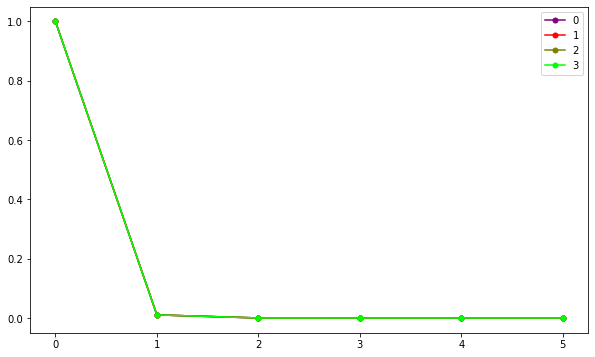

In [33]:
cmap=cm.brg
color3=cmap(arange(1,p+1)/p)

for i in range(p):
    plot(range(dim+1),EIGe[i],color=color3[i],marker='.',markersize=10,label=str(i))

print(EIGe)

plt.gcf().set_size_inches(10,6)
plt.legend()
plt.show()

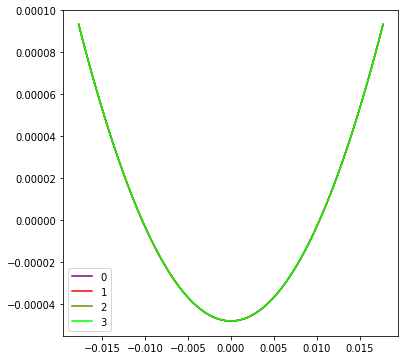

In [34]:
for i in range(p):
    plot(EMBe[str(i)][:,1],EMBe[str(i)][:,2],color=color3[i],label=str(i))

plt.gcf().set_size_inches(6,6)
plt.legend()
plt.show()

# 1

In [8]:
dim = 5
n = 10
q = 10
EMB, EIG = test(n,q,dim)

n =  10
duration...  0.0062 s

n =  20
duration...  0.0011 s

n =  40
duration...  0.0013 s

n =  80
duration...  0.0023 s

n =  160
duration...  0.0027 s

n =  320
duration...  0.0073 s

n =  640
duration...  0.0201 s

n =  1280
duration...  0.0830 s

n =  2560
duration...  0.3728 s

n =  5120
duration...  2.1511 s



[[1.00000 0.15336 0.00993 0.00039 0.00001 0.00000]
 [1.00000 0.15422 0.01026 0.00043 0.00001 0.00000]
 [1.00000 0.15444 0.01034 0.00044 0.00001 0.00000]
 [1.00000 0.15449 0.01036 0.00044 0.00001 0.00000]
 [1.00000 0.15451 0.01037 0.00045 0.00001 0.00000]
 [1.00000 0.15451 0.01037 0.00045 0.00001 0.00000]
 [1.00000 0.15451 0.01037 0.00045 0.00001 0.00000]
 [1.00000 0.15451 0.01037 0.00045 0.00001 0.00000]
 [1.00000 0.15451 0.01037 0.00045 0.00001 0.00000]
 [1.00000 0.15451 0.01037 0.00045 0.00001 0.00000]]


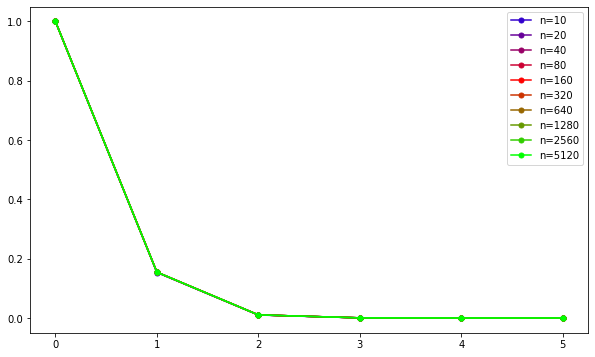

In [16]:
cmap=cm.brg
color=cmap(arange(1,q+1)/q)

for i in range(q):
    plot(range(dim+1),EIG[i],color=color[i],marker='.',markersize=10,label='n='+str(n*(2**i)))

print(EIG)

plt.gcf().set_size_inches(10,6)
plt.legend()
plt.show()

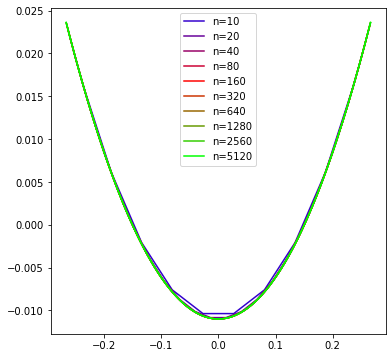

In [17]:
for i in range(q):
    plot(EMB[str(n*(2**i))][:,1],EMB[str(n*(2**i))][:,2],color=color[i],label='n='+str(n*(2**i)))

plt.gcf().set_size_inches(6,6)
plt.legend()
plt.show()

[[0.00000 0.00086 0.00033 0.00004 0.00000 0.00000]
 [0.00000 0.00022 0.00008 0.00001 0.00000 0.00000]
 [0.00000 0.00005 0.00002 0.00000 0.00000 0.00000]
 [0.00000 0.00001 0.00001 0.00000 0.00000 0.00000]
 [0.00000 0.00000 0.00000 0.00000 0.00000 0.00000]
 [0.00000 0.00000 0.00000 0.00000 0.00000 0.00000]
 [0.00000 0.00000 0.00000 0.00000 0.00000 0.00000]
 [0.00000 0.00000 0.00000 0.00000 0.00000 0.00000]
 [0.00000 0.00000 0.00000 0.00000 0.00000 0.00000]]


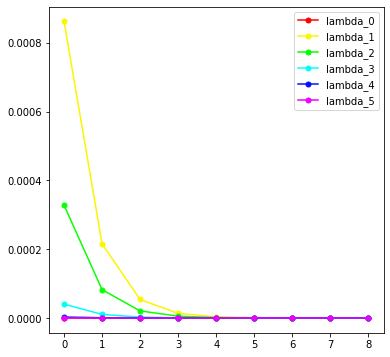

In [18]:
cmap2=cm.hsv
color2=cmap2(arange(dim+1)/(dim+1))

delta = []
for i in range(1,q):
    delta.extend(abs(EIG[i]-EIG[i-1]))
delta = array(delta).reshape(q-1,dim+1)

print(delta)

for i in range(dim+1):
    plot(range(q-1),delta[:,i],color=color2[i],marker='.',markersize=10,label='lambda_'+str(i))

plt.gcf().set_size_inches(6,6)
plt.legend()
plt.show()

[[0.00000 0.36464 0.13128 0.03306 0.00676 0.00123]
 [0.00000 0.25802 0.09329 0.02374 0.00492 0.00088]
 [0.00000 0.18243 0.06592 0.01678 0.00350 0.00062]
 [0.00000 0.12897 0.04657 0.01192 0.00250 0.00045]
 [0.00000 0.09119 0.03290 0.00844 0.00177 0.00032]
 [0.00000 0.06447 0.02326 0.00597 0.00125 0.00023]
 [0.00000 0.04559 0.01644 0.00422 0.00089 0.00016]
 [0.00000 0.03224 0.01162 0.00299 0.00063 0.00012]
 [0.00000 0.02279 0.00822 0.00211 0.00044 0.00008]]


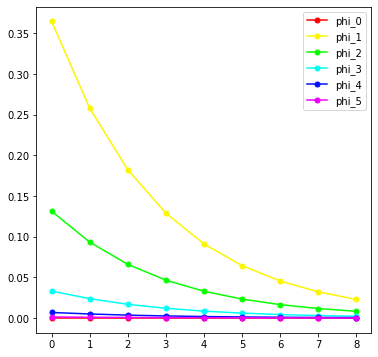

In [19]:
deltaemb = []
for i in range(q-1):
    tmp = abs(EMB[str(n*(2**i))][::(2**i),:]-EMB[str(n*(2**(i+1)))][::(2**(i+1)),:])
    deltaemb.extend(sqrt(sum(tmp, axis=0)))
deltaemb = array(deltaemb).reshape(q-1,dim+1)

print(deltaemb)

for i in range(dim+1):
    plot(range(q-1),deltaemb[:,i],color=color2[i],marker='.',markersize=10,label='phi_'+str(i))

plt.gcf().set_size_inches(6,6)
plt.legend()
plt.show()

# 2

In [88]:
def DM2(X,dim,n):
    
    W = WM(X,n)
    D = zeros((n,n))
    
    i=0
    for x in X:
        D[i,i] = 1/(sqrt(pi)/2*(erf(x)-erf(x-1)))
        i+=1

    print(D)
    P = D.dot(W)
    S,U = eigs(P,dim+1)

    L = diag(S.real)
    U = U.real
    for i in range(dim+1):
        if U[0,i]<0:
            U[:,i] = -U[:,i]

    EMB = U.dot(L)
    EMB = EMB*sqrt(n)
    
    return EMB, S.real

In [89]:
%%time
realm = n*(2**0)
Y = arange(realm)/realm
realEMB, realEIG = DM2(Y,dim,realm)

[[1.33900333 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         1.24083461 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         1.16954292 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         1.12117232 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.0931275  0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.08393798
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  1.0931275  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.12117232 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         1.16954292 0.        ]
 [0.         0.         0.   

In [82]:
test(n,1,dim)

n =  10
[[0.12856497 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.12014379 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.11419622 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.11039767 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.10854665 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.10854665
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.11039767 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.11419622 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.12014379 0.        ]
 [0.         0.      

({'10': array([[ 1.        ,  0.23948041,  0.01692304],
         [ 1.        ,  0.18713815,  0.00611955],
         [ 1.        ,  0.13414475, -0.00208163],
         [ 1.        ,  0.08067832, -0.00759678],
         [ 1.        ,  0.02692485, -0.01036882],
         [ 1.        , -0.02692485, -0.01036882],
         [ 1.        , -0.08067832, -0.00759678],
         [ 1.        , -0.13414475, -0.00208163],
         [ 1.        , -0.18713815,  0.00611955],
         [ 1.        , -0.23948041,  0.01692304]])},
 array([[1.        , 0.15336251, 0.00993373]]))

In [31]:
EMB['real'] = realEMB
EIG = vstack([EIG,realEIG])